# **Installation and Import Dataset and Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Model Evaluation
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Ensemble Methods
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


UPLOAD DATSET
- USE TITANIC.CSV

In [5]:
from google.colab import files
uploaded = files.upload()



Saving titanic.csv to titanic.csv


In [6]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **1. Data Preprocessing:**
o Handle missing and noisy data (through imputation, smoothing, or removal).

o Normalize or standardize features.

o Perform feature selection if needed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


1. DATA PREPROCESSING

In [15]:
from sklearn.impute import SimpleImputer

imputer_embarked = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer_embarked.fit_transform(df[['Embarked']]).ravel()


In [16]:
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']]).ravel()


- Irrelevant Features:

Columns like Name, Ticket, and PassengerId were removed as they do not contribute to survival prediction.

In [17]:
df = df.drop(['Cabin','Name','Ticket','PassengerId'], axis=1)

- Categorical features Sex and Embarked were encoded using LabelEncoder.

In [18]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']

- Scaling:

In [20]:
X_scaled = StandardScaler().fit_transform(X)

- Feature Selection:
Using SelectKBest, the top 5 features were selected to reduce noise and improve training efficiency.

In [21]:
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# **2. Model Development:**

o Train three supervised learning models:

▪ Decision Tree

▪ Naïve Bayes

▪ Support Vector Machine

o Evaluate their performance using cross-validation.


In [23]:
# Initialize models
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Train models
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [29]:
models = {'Decision Tree': dt, 'Naive Bayes': nb, 'SVM': svm}



# **3. Performance Analysis:**

o Report accuracy, precision, recall, and F1-score for each model and the ensemble.

o Plot the confusion matrix.


Decision Tree Performance:
Accuracy: 0.799
Precision: 0.788
Recall: 0.703
F1-Score: 0.743


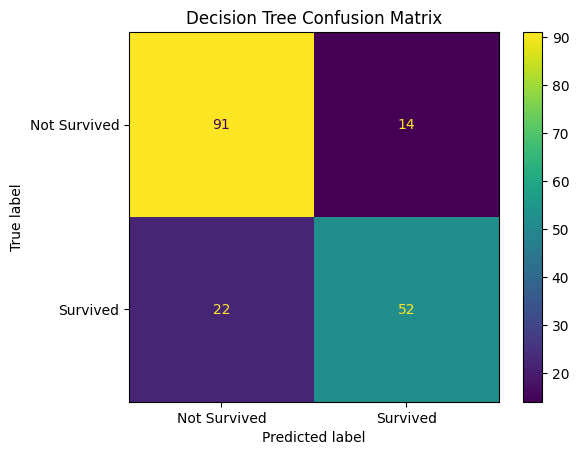


Naive Bayes Performance:
Accuracy: 0.771
Precision: 0.704
Recall: 0.77
F1-Score: 0.735


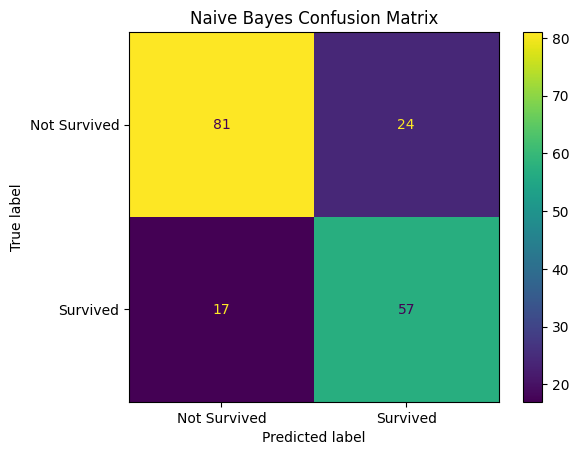


SVM Performance:
Accuracy: 0.804
Precision: 0.842
Recall: 0.649
F1-Score: 0.733


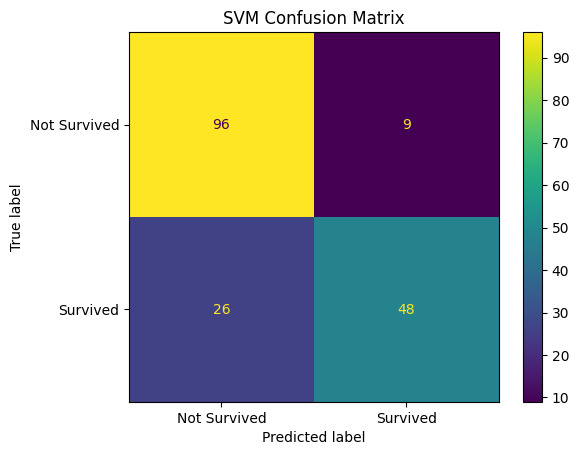

In [33]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1-Score:", round(f1_score(y_test, y_pred), 3))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Not Survived','Survived'])
    disp.plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


# **4. Model Optimization and Ensemble:**

o Apply Bagging or Boosting to improve classification performance.

o Justify why ensemble learning performs better or worse on noisy data.


In [26]:
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bag = bagging_dt.predict(X_test)

print("\nBagging decision tree performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_bag), 3))



Bagging Decision Tree Performance:
Accuracy: 0.827


In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# AdaBoost with Decision Tree as base estimator
adaboost_dt = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

# Train
adaboost_dt.fit(X_train, y_train)

# Predict
y_pred_ada = adaboost_dt.predict(X_test)

# Evaluate
print("\nAdaBoost decision tree performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada), 3))



AdaBoost Decision Tree Performance:
Accuracy: 0.782
